Hello James!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Rusty Bargain Models Evaluations
Introduction
The company Rusty Bargain wants a model developed to predict the market value of a used car given certain specifications. The main goal of the project is to develop models using gradient boosting libraries (LightGBM, XGBoost, and/or CatBoost) in addition to Scikit-Learn's linear regression and random forest regression, which I am more accustomed with. I will compare the quality, training run time, and prediction run time of the models, after preprocessing the data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

## Data preparation

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from lightgbm import LGBMRegressor
import catboost as cb
from xgboost import XGBRegressor

### Loading, processing, and cleaning data

In [2]:
try:
    df = pd.read_csv('car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')

Seeing what datatype and nan's using .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Multiple nans that are still there that needs to be fixed. Will standardize columns names before moving on to missing values

In [4]:
df.columns = ['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen']

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial review.
    
Pro tip: it's useful to check for duplicates
</div>

### Missing values

In [5]:
df.describe(include='all')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,15470,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,18592
top,05/03/2016 14:25,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 07:16
freq,66,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,654
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


When dropping all observations with missing values indiscriminately, over 100,000 observations are lost. Instead, a more systematic approach involves examining each feature with missing values and replacing them ideally with meaningful values.

In [6]:
df.vehicle_type.unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [7]:
df.fuel_type.unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

For categorical features where "other" is already a value in some categories, let's replace missing values (nans) with "unknown".

In [8]:
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired', 'postal_code']
for feat in cat_features:
    df[feat] = df[feat].fillna('unknown')
    df[feat] = df[feat].astype('category')

Before analyzing missing values in numeric columns, it's advisable to drop unnecessary features. Dates are deemed unimportant and might introduce algorithmic issues. Similarly, since postal code is categorical rather than numerical, encoding and training may be problematic. These features are not essential to the automobile's intrinsic properties. Additionally, considering the significance of registration year, the registration month appears trivial.

In [9]:
df = df.drop(['date_crawled', 'registration_month', 'date_created', 'postal_code', 'last_seen'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               354369 non-null  int64   
 1   vehicle_type        354369 non-null  category
 2   registration_year   354369 non-null  int64   
 3   gearbox             354369 non-null  category
 4   power               354369 non-null  int64   
 5   model               354369 non-null  category
 6   mileage             354369 non-null  int64   
 7   fuel_type           354369 non-null  category
 8   brand               354369 non-null  category
 9   not_repaired        354369 non-null  category
 10  number_of_pictures  354369 non-null  int64   
dtypes: category(6), int64(5)
memory usage: 15.9 MB


The DataFrame has been trimmed down and NaNs filled in. Next, I'll examine the numeric features closely to ensure the values are sensible. My focus will be on removing rows with flawed numerical data rather than those with missing categorical data. I believe that the impact of "unknowns" on machine learning outcomes should be less significant than that of highly incorrect numbers. Scaling the numeric data is part of my plan, and I'm mindful that extreme or arbitrary outliers could impact this process.

In [11]:
df.describe()

,price,registration_year,power,mileage,number_of_pictures
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.0
mean,4416.656776,2004.234448,110.094337,128211.172535,0.0
std,4514.158514,90.227958,189.850405,37905.341530,0.0
min,0.000000,1000.000000,0.000000,5000.000000,0.0
25%,1050.000000,1999.000000,69.000000,125000.000000,0.0
50%,2700.000000,2003.000000,105.000000,150000.000000,0.0
75%,6400.000000,2008.000000,143.000000,150000.000000,0.0
max,20000.000000,9999.000000,20000.000000,150000.000000,0.0


Upon inspection of the dataset, I have identified several issues with certain columns:
- The Price column contains some 0 values, which while technically possible, seem unlikely.
- The Registration_year column has values at 1000 and 9999, both of which are unreasonable.
- The Power column has values at 0 and 20,000, both of which are unreasonable.
- Over half of the values in the Mileage column are 150,000, suggesting a ceiling value for mileage. I will not modify this column.
- The number_of_pictures feature appears to be useless, as every value is 0. I will drop this column from the dataset.

In [12]:
df = df.drop('number_of_pictures', axis=1)

I want to check out some of the rows where the price is 0.

In [13]:
print(df[df.price == 0].count()[0])
df[df.price == 0].sample(10, random_state=0)

10772


,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
33139,0,unknown,1990,unknown,0,corsa,150000,unknown,opel,unknown
37386,0,small,1997,manual,60,ka,150000,petrol,ford,unknown
183676,0,small,2002,auto,0,fortwo,150000,gasoline,smart,no
191182,0,small,2001,manual,55,seicento,90000,petrol,fiat,yes
156065,0,unknown,2016,manual,60,punto,150000,unknown,fiat,no
47795,0,small,1996,manual,0,golf,150000,petrol,volkswagen,unknown
312852,0,sedan,1999,auto,193,a4,150000,petrol,audi,yes
175419,0,unknown,1990,unknown,0,unknown,150000,unknown,sonstige_autos,unknown
304637,0,sedan,1998,auto,0,5er,150000,petrol,bmw,unknown
214842,0,sedan,1997,manual,75,golf,150000,petrol,volkswagen,no


Upon further analysis, I have observed that many of the approximately 11,000 observations with a price of 0 also contain other unknown values. These observations often have high mileage (>150,000) and/or were registered in the 1900s. It could be reasonable to assume that these automobiles were sold for free, so I have decided to keep these observations in the dataset.

In [14]:
print(df.shape)
df = df.drop(df.loc[df.price==0].index)
df.shape

(354369, 10)


(343597, 10)

Next, I plan to remove rows containing unreasonable values in the `registration_year` column. To begin, I will examine a histogram that is zoomed in on the plausible range of years for used cars.

Text(0.5, 1.0, 'Distribution of registration years')

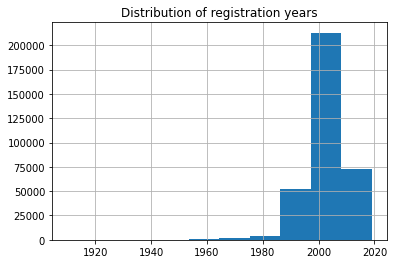

In [15]:
df.registration_year.loc[(df.registration_year > 1900) & (df.registration_year < 2023)].hist()
plt.title("Distribution of registration years")

The registration year values range from around 1950/1960 to 2019. I will exclude any values before 1950 and after 2019 from the dataset.

In [16]:
print(df.shape)
drops = df.loc[(df.registration_year < 1950) | (df.registration_year > 2019)].index
df = df.drop(drops)
print(df.shape)

(343597, 10)
(343332, 10)


I will apply a similar approach to the horsepower column. Based on quick research, top-of-the-line cars in 2022 typically have around 2,000 horsepower. It's highly unlikely for an automobile to have 0 horsepower.

Text(0.5, 1.0, 'Distribution of horsepower')

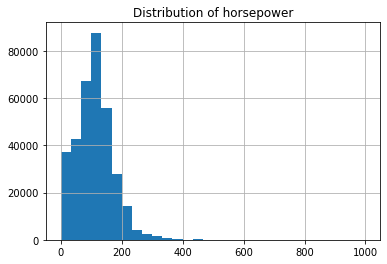

In [17]:
df.power[df.power < 1000].hist(bins=30)
plt.title("Distribution of horsepower")

In [18]:
df.loc[df.power >500]

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
1816,3200,small,2004,manual,1398,corolla,5000,petrol,toyota,no
4060,3100,sedan,2005,manual,953,colt,150000,gasoline,mitsubishi,no
5328,500,wagon,1999,manual,1001,astra,150000,petrol,opel,unknown
6296,599,small,2002,manual,603,matiz,5000,petrol,chevrolet,yes
6504,3000,small,2009,manual,771,punto,125000,petrol,fiat,unknown
...,...,...,...,...,...,...,...,...,...,...
348968,250,small,1999,manual,1241,ypsilon,150000,petrol,lancia,yes
351947,1500,bus,2001,manual,1001,zafira,5000,gasoline,opel,no
353493,12500,unknown,2017,manual,2000,other,60000,gasoline,chrysler,no
353633,2400,sedan,2007,manual,650,c2,150000,petrol,citroen,unknown


Examining rows with a power value of 0.

In [19]:
df.loc[df.power==0]

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
0,480,unknown,1993,manual,0,golf,150000,petrol,volkswagen,unknown
32,245,sedan,1994,unknown,0,golf,150000,petrol,volkswagen,no
37,1500,unknown,2016,unknown,0,kangoo,150000,gasoline,renault,no
54,4700,wagon,2005,manual,0,signum,150000,unknown,opel,no
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes
...,...,...,...,...,...,...,...,...,...,...
354336,3299,unknown,2005,auto,0,outlander,150000,petrol,mitsubishi,unknown
354338,180,unknown,1995,unknown,0,unknown,125000,petrol,opel,unknown
354346,2600,unknown,2005,auto,0,c_klasse,150000,unknown,mercedes_benz,unknown
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no


After conducting a Google search on some of these results, I found that both extremely high and low power values are inaccurate. To maintain data integrity in training my models, I have decided to remove rows where horsepower exceeds 500. While there may still be inaccuracies in rows with power under 500, I prefer a conservative approach. Additionally, I will eliminate rows where power is 0, as I noticed many unknown values in a sample of these rows. This cleanup process should improve the overall quality of the data.

In [20]:
print(df.shape)
df = df.drop(df[(df.power>500) | (df.power==0)].index)
df.shape

(343332, 10)


(306734, 10)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Creating Models

I plan to construct a linear regression model, a random forest regression model, and three gradient boosted models using LightGBM, XGBoost, and CatBoost.

The target variable will be the price column, and the features will include the remaining columns after trimming down the dataframe to only include the desired columns.

Initially, I experimented with models using standardized numeric data, but the impact was minimal. This approach also hindered cross-validation and GridSearch usage, prompting me to remove the standardization step.

In [21]:
def rmse_calc(actual, prediction):
    """
    This function is a shortcut for returning the root mean square error of a prediction or set of predictions.
    """
    rmse = np.sqrt(mean_squared_error(actual, prediction))
    return(rmse)

In [22]:
def pop_row(df):
    """
    This function saves a random observation from a dataframe into its own variable, and then removes that row from the original dataframe. 
    I will use this function to see how long it takes for the models to make one prediction. 
    
    The function takes the dataframe as an input, and saves and drops a row, saves the features and the price into their own feature and 
    target series, and returns these two series as a tuple.
    """
    my_pred = df.sample(1, random_state=0)
    df = df.drop(my_pred.index)
    my_pred_feat = my_pred.drop('price', axis=1)
    my_pred_target = my_pred.price
    return my_pred_feat, my_pred_target

### Linear Regression

Let's first train a linear regression model.

In [23]:
df_ohe = pd.get_dummies(df, drop_first=True)

target_ohe = df_ohe.price
features_ohe = df_ohe.drop('price', axis=1)

features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(
    features_ohe, target_ohe, test_size=0.1, random_state=0)

In [24]:
%%time
model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe)

CPU times: user 16.7 s, sys: 7.93 s, total: 24.7 s
Wall time: 24.6 s


LinearRegression()

Training the model consumed 22 CPU seconds. Now, let's proceed with predictions and measure the time taken. We can calculate the average time per prediction by dividing the total time by the length of the test set.

In [25]:
num_predictions = features_test_ohe.shape[0]
num_predictions

30674

In [26]:
# 0.107 s / 30674 predictions
.107 / num_predictions

3.4882962769772445e-06

Each prediction took about 3.5e-6 seconds.

In [27]:
model = LinearRegression()
scores = cross_val_score(model, features_train_ohe, target_train_ohe, scoring='neg_root_mean_squared_error', cv=5)
score = scores.mean() * -1
score

2583.8319217752733

An RMSE (Root Mean Squared Error) of 2,584 appears relatively high. As a sanity check, it's reasonable to compare the RMSE to the standard deviation. Let's perform this comparison first and later evaluate both results by comparing them with a proper dummy model.

In [28]:
np.std(df.price)

4584.375334062223

The RMSE for this model is notably below one standard deviation.

In summary, employing a standard linear regression model results in a cross-validated RMSE of 2584. The model required 22 CPU seconds for training and approximately 3.5e-6 CPU seconds for each prediction.

## Dummy Model

I intend to evaluate a true dummy model's performance to confirm that linear regression outperforms the mean.


In [29]:
predicted_valid = pd.Series(target_train_ohe.mean(), index=target_train_ohe.index)
print('RMSE:', rmse_calc(target_train_ohe, predicted_valid))

RMSE: 4585.715126979061


I am pleased to find that my decision to compare RMSE with the standard deviation as a quick benchmark appears justified, as the standard deviation value closely resembles the RMSE obtained from predicting the mean.

## Random Forest Model

Next, let's construct another familiar model, namely a random forest regressor. I will iterate through various hyperparameters to identify the ones that produce the lowest RMSE. I anticipate that the RMSE for this model will be lower than that of the linear regression model.

In [30]:
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
df_ord = df

encoder = OrdinalEncoder()
df_ord[cat_features] = encoder.fit_transform(df_ord[cat_features])

target_ord = df_ord.price
features_ord = df_ord.drop('price', axis=1)

features_train_ord, features_test_ord, target_train_ord, target_test_ord = train_test_split(
    features_ord, target_ord, test_size=1/10, random_state=0)

features_train_ord, features_valid_ord, target_train_ord, target_valid_ord = train_test_split(
    features_train_ord, target_train_ord, test_size=1/9, random_state=0)

# best_est = 0
# best_depth = 0
# best_model = None
# best_rmse = 1000000
# for est in range(100,151,10):
#     for depth in range(10,26):
#         model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=0, max_features='sqrt')
#         model.fit(features_train_ord, target_train_ord)
#         pred = model.predict(features_valid_ord)
#         rmse = rmse_calc(target_valid_ord, pred)
        
#         print(est, depth, rmse)
#         if rmse < best_rmse:
#             best_rmse = rmse
#             best_model = model
#             best_depth = depth
#             best_est = est
# print(f"Number of trees: {best_est}\nMax Depth: {best_depth}\nBest RMSE: {best_rmse}")

I won't employ cross-validation for this model evaluation or for future ones because of the significant time investment it entails.

In [31]:
%%time
model = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=0, max_features='sqrt')
model.fit(features_train_ord, target_train_ord)

CPU times: user 38.7 s, sys: 0 ns, total: 38.7 s
Wall time: 38.9 s


RandomForestRegressor(max_depth=22, max_features='sqrt', random_state=0)

I find it intriguing that the CPU time for this model's training is less than the wall time on my local machine.

In [32]:
%%time
pred = model.predict(features_test_ord)

CPU times: user 1.46 s, sys: 0 ns, total: 1.46 s
Wall time: 1.49 s


In [33]:
# 1.23 seconds / number of predictions
1.23 / num_predictions

4.0099106735345893e-05

Each prediction takes about 4.0e-5 seconds.

In [34]:
rmse_calc(target_test_ord, pred)

1549.9188003038382

Thus, the estimated RMSE stands at 1550. The model required 34.8 CPU seconds for training, with each prediction taking approximately 4.0e-5 seconds. Notably, the RMSE outperforms that of the linear regression model.

## LightGBM

Next, I will proceed to train the initial gradient boosted model, experimenting with various hyperparameters.

In [35]:
features = df.drop('price', axis=1)
target = df.price

The grid search combined with cross-validation will consume more time than it offers value for this model exploration.

Given that the number of estimators (n_estimators) typically correlates positively with model quality, I will set this value to a high constant and manually adjust different maximum depths and learning rates.

In [36]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=1/10, random_state=0)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=1/9, random_state=0)

In [37]:
# best_depth = 0
# best_rmse = 1000000
# for depth in range(9,17):
#     model = LGBMRegressor(n_estimators=5000, max_depth=depth, random_state=0)
#     model.fit(features_train, target_train)
#     pred = model.predict(features_valid)
#     rmse = rmse_calc(target_valid, pred)
    
#     if rmse < best_rmse:
#         best_depth = depth
#         best_rmse = rmse

# print('depth:', best_depth)
# print('rmse:', best_rmse)

In [38]:
# best_rate = 0
# best_rmse = 1000000
# for rate in [0.05, 0.1, 0.25]:
#     model = LGBMRegressor(learning_rate=rate, n_estimators=5000, max_depth=14, random_state=0)
#     model.fit(features_train, target_train)
#     pred = model.predict(features_valid)
#     rmse = rmse_calc(target_valid, pred)

#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_rate = rate
        
# print('rate:', best_rate)
# print(f"RMSE: {best_rmse}")

The default learning rate of 0.1 appears to be suitable. I will utilize these parameters to validate a final model and assess the training time.

To expedite the final run, I have commented out the hyperparameter tuning code. The hyperparameter results can be found in the model settings below.

In [39]:
%%time
model = LGBMRegressor(learning_rate=0.1, n_estimators=5000, max_depth=14, random_state=0)
model.fit(features_train, target_train)

KeyboardInterrupt: 

In [40]:
%%time
pred = model.predict(features_test)

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [41]:
# seconds / number of predictions
23.8 / num_predictions

0.0007759014148790507

In [42]:
rmse_calc(target_test, pred)

1549.9188003038382

Training the model on the complete dataset consumes 1 minute and 49 seconds of CPU time, with each prediction taking approximately 7.8e-4 seconds. The estimated RMSE of 1517 is marginally better than the random forest model's RMSE of 1550.

In terms of model performance, LightGBM yields a superior RMSE, albeit requiring about 3 times longer for training.

## CatBoost

It's time to employ CatBoost. CatBoost can utilize the standard features and targets without requiring additional encoding. Initially, I aim to assess the model's performance without tuning hyperparameters.

In [43]:
train_dataset = cb.Pool(features_train, target_train)
valid_dataset = cb.Pool(features_valid, target_valid)

In [44]:
model = cb.CatBoostRegressor(random_state=0, loss_function='RMSE', verbose=False)
model.fit(features_train, target_train)
pred = model.predict(features_valid)
rmse_calc(target_valid, pred)

KeyboardInterrupt: 

An RMSE of 1613 appears acceptable considering that no hyperparameters were tuned.

In [ ]:
# %%time
# model_cb = cb.CatBoostRegressor(random_state=0, loss_function='RMSE', verbose=False, iterations=5000)
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]
#        }

# model_cb.grid_search(grid, train_dataset, verbose=False)
# pred = model_cb.predict(valid_dataset)
# rmse_calc(target_valid, pred)

In [ ]:
# model_cb.get_params()

In [ ]:
%%time
model = cb.CatBoostRegressor(random_state=0, loss_function='RMSE', verbose=False, iterations=5000, depth=8, l2_leaf_reg=1, learning_rate=0.1)
model.fit(features_train, target_train)

In [ ]:
%%time
pred = model.predict(features_test)

In [ ]:
0.397 / num_predictions

In [ ]:
rmse_calc(target_test, pred)

The CatBoost model achieved an RMSE of 1516, with a training time of 4 minutes and 40 seconds in CPU time. The prediction time was approximately 1.3e-5 seconds per prediction. This model demonstrated performance comparable to LightGBM in terms of RMSE but required significantly longer training time.

I've decided to skip XGBoost as these models require extensive training and optimization efforts, and I believe I have gained a good understanding of how these models operate.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good!
</div>

In conclusion, after training multiple models, it was observed that linear regression had the quickest training time but produced the highest root mean square error (RMSE). Both gradient boosting models exhibited similar RMSEs, with LightGBM outperforming CatBoost in terms of training speed. Random forest regression trained even faster than LightGBM but had a higher RMSE. Although LightGBM required more time to make test predictions than CatBoost and random forest, the total training and prediction time was still lower than that of CatBoost.

The model is intended for single predictions by users on their website, and regardless of the model chosen, the prediction time is expected to be less than a millisecond.

Overall, the LightGBM regression model is recommended for this task due to its balanced performance in terms of model quality and training time.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good conclusion! Also, we can add graph to compare RMSE, train/predict time.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

James, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- deep analysis
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
</div>